In [2]:
import os
os.chdir('/Users/youshodeepacharya/Desktop/plant_disease_prediction')
print("Now in:", os.getcwd())








Now in: /Users/youshodeepacharya/Desktop/plant_disease_prediction


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size and batch size
image_size = (150, 150)
batch_size = 32

# Create ImageDataGenerator for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split off 20% for validation
)

# Training generator
train_generator = train_datagen.flow_from_directory(
    '/Users/youshodeepacharya/Desktop/plant_disease_prediction/Plant_dataset_cleaned',  # Updated path
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Validation generator
val_generator = train_datagen.flow_from_directory(
    '/Users/youshodeepacharya/Desktop/plant_disease_prediction/Plant_dataset_cleaned',  # Updated path
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Check class labels and data loading
print("Training class labels:", train_generator.class_indices)
print("Number of training samples:", train_generator.samples)
print("Number of validation samples:", val_generator.samples)

Found 14047 images belonging to 4 classes.
Found 3511 images belonging to 4 classes.
Training class labels: {'Healthy': 0, 'Pepper_Bell': 1, 'Potato': 2, 'Tomato': 3}
Number of training samples: 14047
Number of validation samples: 3511


In [3]:
# Show class indices
train_generator.class_indices

{'Healthy': 0, 'Pepper_Bell': 1, 'Potato': 2, 'Tomato': 3}

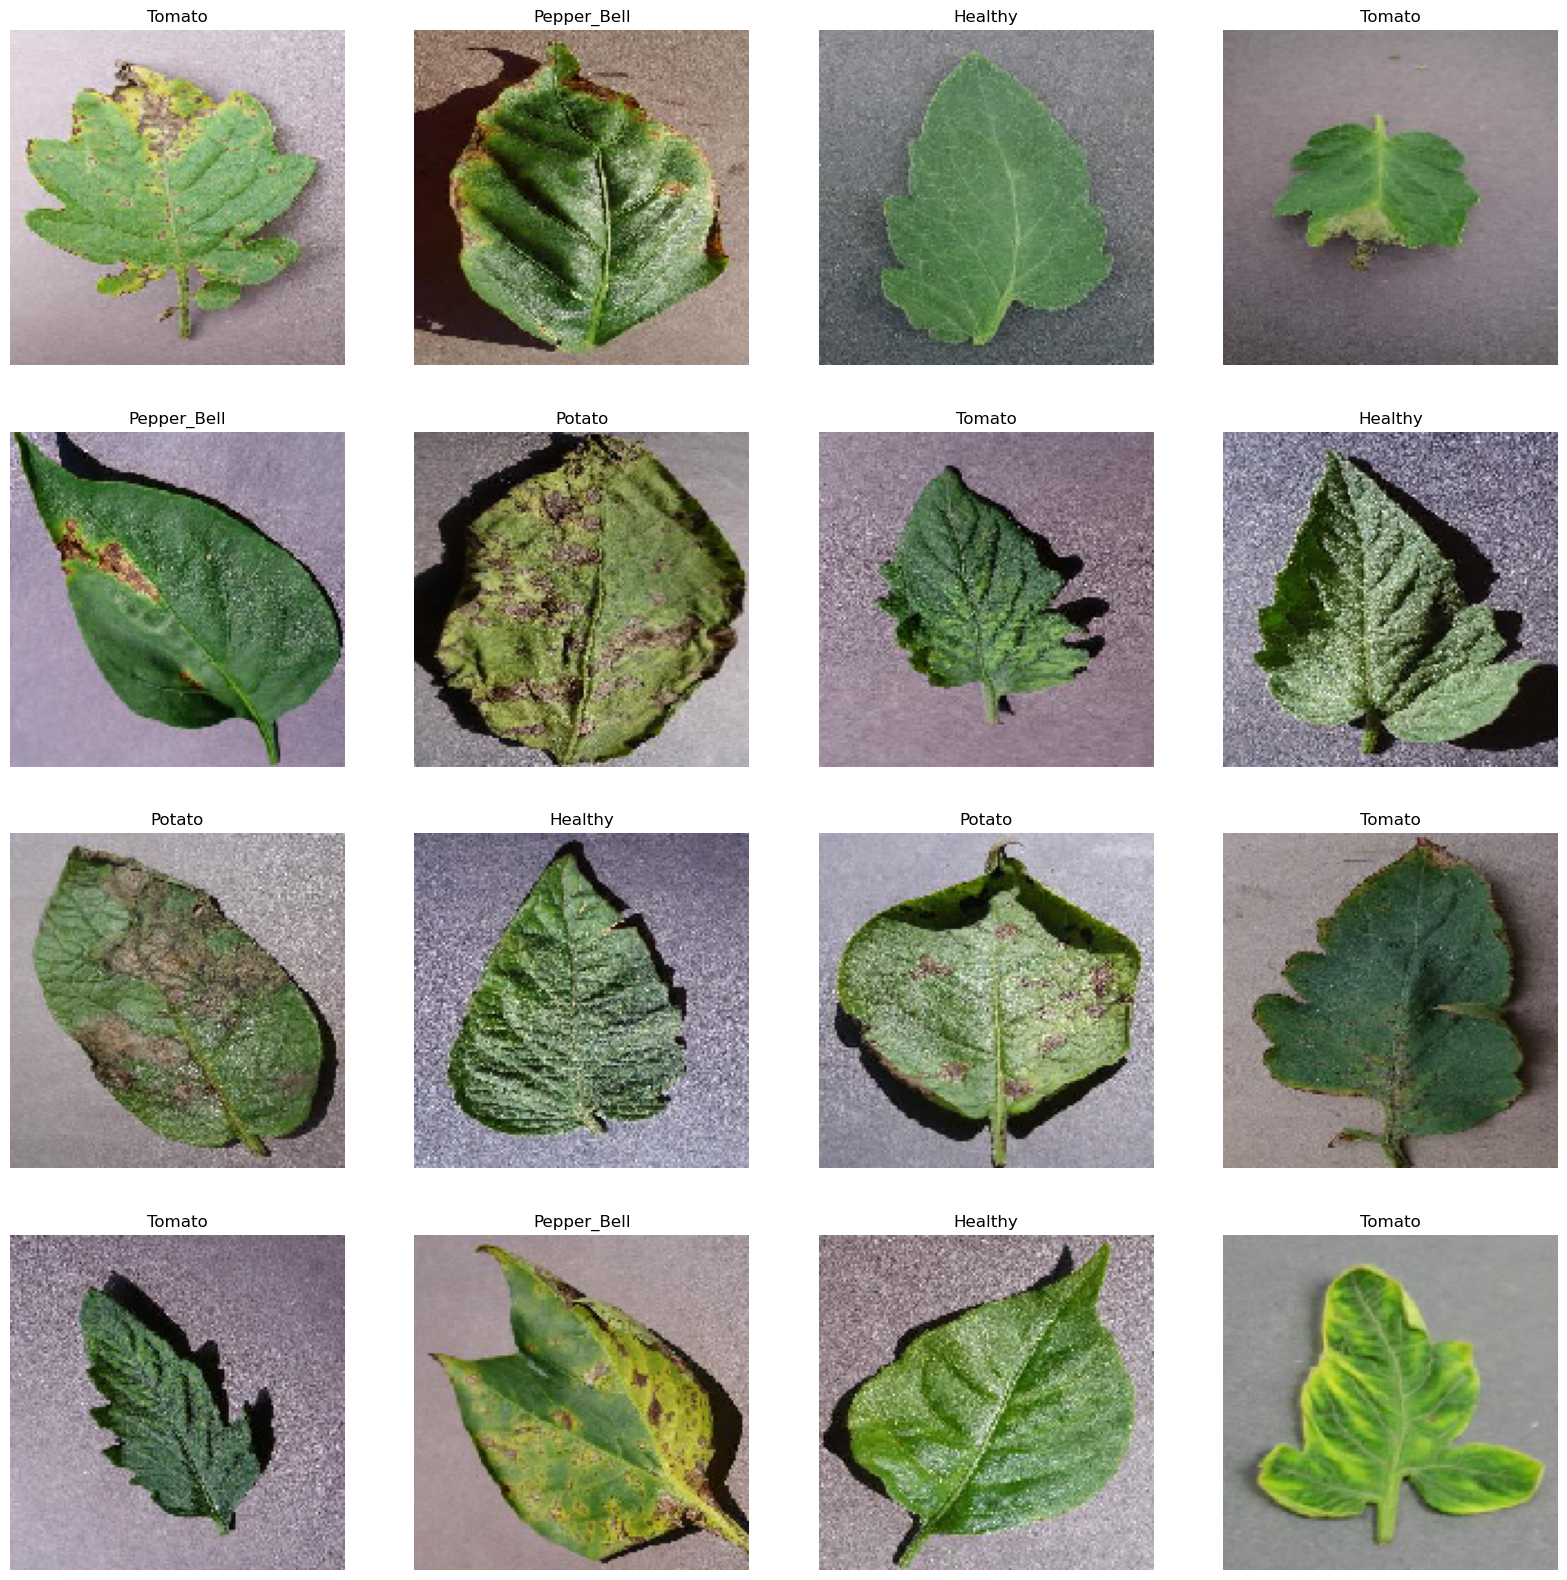

In [4]:
# Display sample images from training set
classes = list(train_generator.class_indices.keys())
plt.figure(figsize=(20, 20))
for X_batch, y_batch in train_generator:
    for i in range(0, 16):
        plt.subplot(4, 4, i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i] == 1)[0][0]])
        plt.axis('off')
    plt.show()
    break

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.optimizers import Adam
import json

# Define the model architecture
model = Sequential()

# Use Input() instead of passing input_shape directly to Conv2D (avoids warning)
model.add(Input(shape=(150, 150, 3)))

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))

# ✅ Correct output layer for multi-class classification
model.add(Dense(train_generator.num_classes, activation='softmax'))

# ✅ Use correct loss function
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# Save the model
model.save('plant_disease_model.keras')

# ✅ Save class indices for use during prediction
with open('class_indices.json', 'w') as f:
    json.dump(train_generator.class_indices, f)

Epoch 1/10


/Users/youshodeepacharya/anaconda3/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


439/439 ━━━━━━━━━━━━━━━━━━━━ 128s 290ms/step - accuracy: 0.7544 - loss: 0.7810 - val_accuracy: 0.8864 - val_loss: 0.3382
Epoch 2/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 157s 357ms/step - accuracy: 0.9115 - loss: 0.2475 - val_accuracy: 0.9334 - val_loss: 0.1977
Epoch 3/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 4425s 10s/step - accuracy: 0.9537 - loss: 0.1289 - val_accuracy: 0.9217 - val_loss: 0.2498
Epoch 4/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 1876s 4s/step - accuracy: 0.9678 - loss: 0.0852 - val_accuracy: 0.9482 - val_loss: 0.1643
Epoch 5/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 151s 343ms/step - accuracy: 0.9835 - loss: 0.0474 - val_accuracy: 0.9462 - val_loss: 0.1858
Epoch 6/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 207s 471ms/step - accuracy: 0.9822 - loss: 0.0519 - val_accuracy: 0.9539 - val_loss: 0.1944
Epoch 7/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 241s 548ms/step - accuracy: 0.9901 - loss: 0.0273 - val_accuracy: 0.9368 - val_loss: 0.2563
Epoch 8/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 230s 524ms/step - accuracy: 0.9869 - loss: 0.0399 

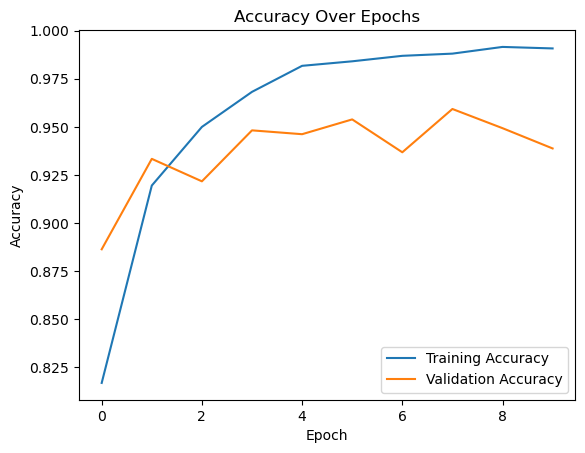

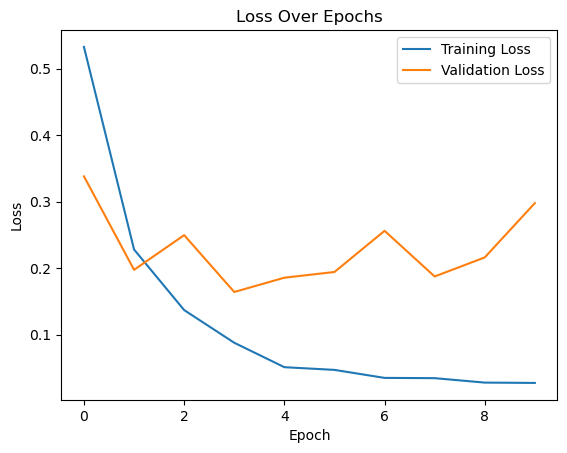

In [6]:
import matplotlib.pyplot as plt

# Plotting accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [8]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import json

# Load the saved model
model = load_model('plant_disease_model.keras')

# Define image size (must match what was used in training)
image_size = (150, 150)

# Load and preprocess the image
img_path = '/Users/youshodeepacharya/Desktop/test_images/test_image.jpg'  # Change if needed
img = load_img(img_path, target_size=image_size)
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Model expects a batch

# Make prediction
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)

# Load class labels
with open('class_indices.json', 'r') as f:
    class_indices = json.load(f)

# Map index back to class label
labels = {v: k for k, v in class_indices.items()}

# Print predicted class
print("Predicted class:", labels[predicted_class_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted class: Tomato
